# PROBLEM STATEMENT

- You have been hired as a consultant to a major Automotive Manufacturer and you have been tasked to develop a model to predict the impact of increasing the vehicle horsepower (HP) on fuel economy (Mileage Per Gallon (MPG)). You gathered the data:
- Data set:
    - Independant variable X: Vehicle Horse Power
    - Dependant variable Y: Mileage Per Gallon (MPG)

# STEP #1: LIBRARIES IMPORT


In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# STEP #2: IMPORT DATASET

In [3]:
from google.colab import files
uploaded=files.upload()

Saving FuelEconomy.csv to FuelEconomy.csv


In [4]:
fueleconomy_df = pd.read_csv('FuelEconomy.csv')

In [5]:
fueleconomy_df.head(100)

,Horse Power,Fuel Economy (MPG)
0,118.770799,29.344195
1,176.326567,24.695934
2,219.262465,23.952010
3,187.310009,23.384546
4,218.594340,23.426739
...,...,...
95,162.810542,27.418661
96,266.869640,15.989945
97,243.831211,19.253375
98,140.959803,29.515593


# STEP#3: VISUALIZE DATASET

In [6]:
fueleconomy_df.head(5)

,Horse Power,Fuel Economy (MPG)
0,118.770799,29.344195
1,176.326567,24.695934
2,219.262465,23.952010
3,187.310009,23.384546
4,218.594340,23.426739


In [7]:
fueleconomy_df.tail(5)

,Horse Power,Fuel Economy (MPG)
95,162.810542,27.418661
96,266.869640,15.989945
97,243.831211,19.253375
98,140.959803,29.515593
99,184.123053,25.196097


In [8]:
fueleconomy_df.describe()

,Horse Power,Fuel Economy (MPG)
count,100.000000,100.000000
mean,213.676190,23.178501
std,62.061726,4.701666
min,50.000000,10.000000
25%,174.996514,20.439516
50%,218.928402,23.143192
75%,251.706476,26.089933
max,350.000000,35.000000


In [9]:
fueleconomy_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 2 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Horse Power         100 non-null    float64
 1   Fuel Economy (MPG)  100 non-null    float64
dtypes: float64(2)
memory usage: 1.7 KB


In [10]:
fueleconomy_df.head(4)

,Horse Power,Fuel Economy (MPG)
0,118.770799,29.344195
1,176.326567,24.695934
2,219.262465,23.952010
3,187.310009,23.384546


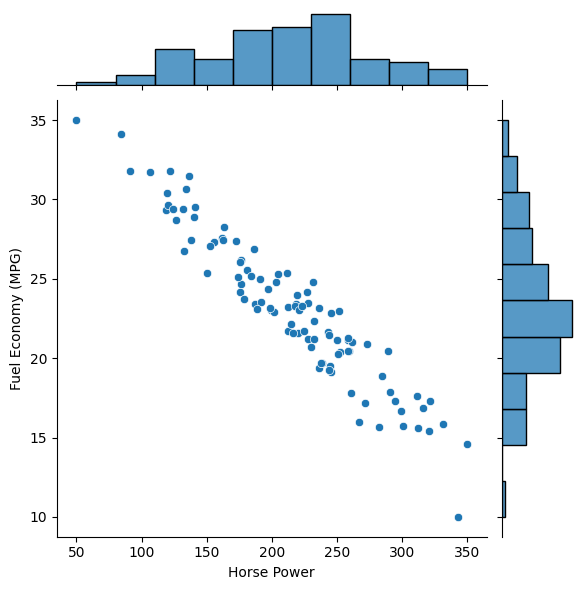

In [11]:
sns.jointplot(x = 'Horse Power', y = 'Fuel Economy (MPG)', data = fueleconomy_df)

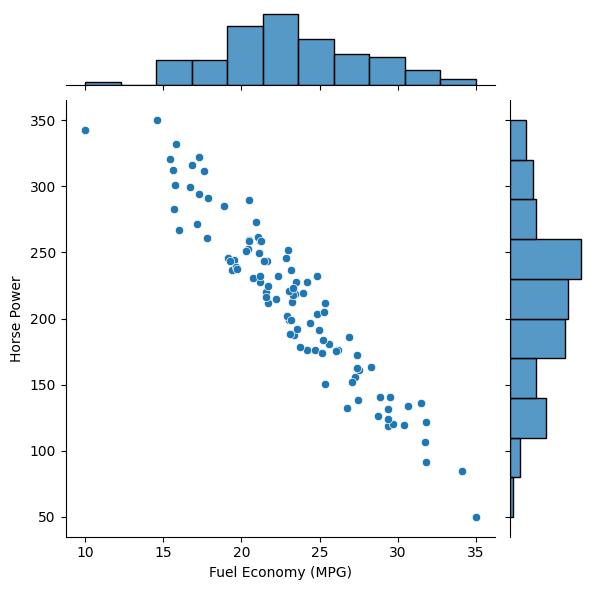

In [12]:
sns.jointplot(x = 'Fuel Economy (MPG)', y = 'Horse Power', data = fueleconomy_df)

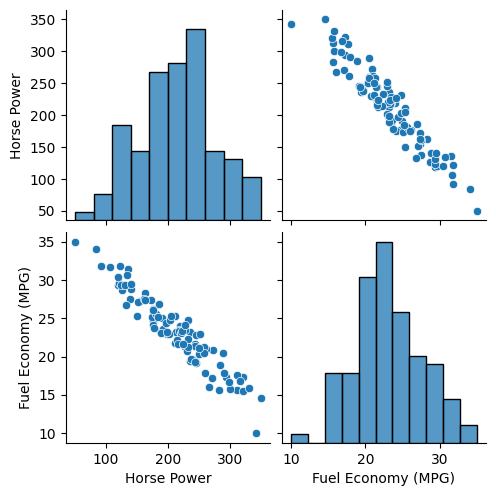

In [13]:
sns.pairplot(fueleconomy_df)

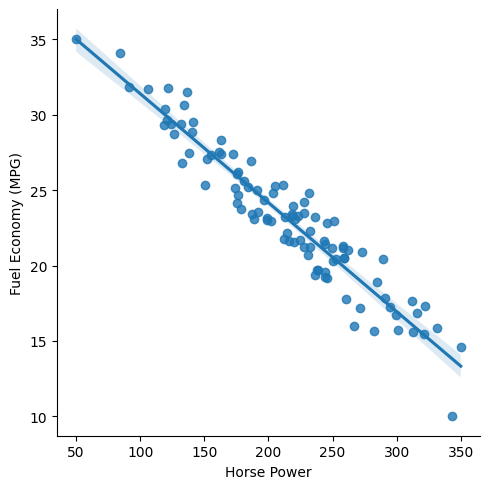

In [14]:
sns.lmplot(x = 'Horse Power', y =  'Fuel Economy (MPG)', data = fueleconomy_df)

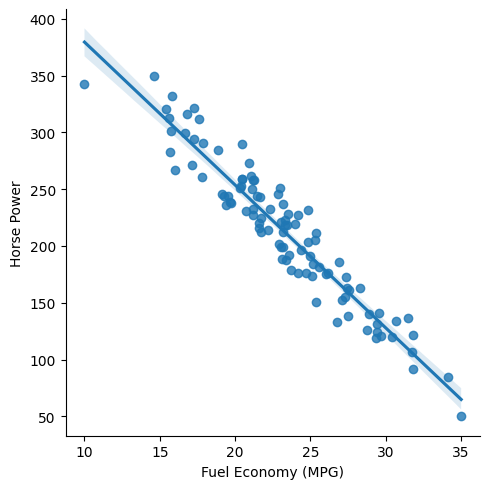

In [15]:
sns.lmplot(x = 'Fuel Economy (MPG)', y =  'Horse Power', data = fueleconomy_df)

# STEP#4: CREATE TESTING AND TRAINING DATASET

In [16]:
X = fueleconomy_df[['Horse Power']]

In [17]:
y = fueleconomy_df['Fuel Economy (MPG)']

In [19]:
X

,Horse Power
0,118.770799
1,176.326567
2,219.262465
3,187.310009
4,218.594340
...,...
95,162.810542
96,266.869640
97,243.831211
98,140.959803


In [20]:
y

,Fuel Economy (MPG)
0,29.344195
1,24.695934
2,23.952010
3,23.384546
4,23.426739
...,...
95,27.418661
96,15.989945
97,19.253375
98,29.515593


In [21]:
X.shape

(100, 1)

In [22]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)

# STEP#5: TRAIN THE MODEL

In [23]:
X_train.shape

(70, 1)

In [24]:
X_test.shape

(30, 1)

In [28]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression(fit_intercept = True)
regressor.fit(X_train, y_train)

LinearRegression()

In [29]:
print('Linear Model Coeff (m):', regressor.coef_)
print('Linear Model Coeff (b):', regressor.intercept_)

Linear Model Coeff (m): [-0.07391722]
Linear Model Coeff (b): 38.75444942874648


# STEP#6: TEST THE MODEL

In [30]:
y_predict = regressor.predict(X_test)
y_predict

array([19.65245031, 27.62944665, 19.66101568, 28.53430534, 14.96487707,
       21.94714368, 25.72088047, 31.99543969, 25.14458598, 20.16984995,
       14.23621279, 18.69024149, 26.71994747, 28.67905589, 20.58408937,
       22.43937159, 27.26657814, 30.90018661, 20.73112512, 29.91863246,
       22.76754484, 32.50312321, 20.76685509, 16.61399191, 25.74655548,
       18.58201667, 15.41009921, 23.02937806, 25.00288727, 21.26772522])

In [31]:
y_test

,Fuel Economy (MPG)
26,21.167343
50,25.345632
74,21.261778
34,27.473415
10,17.300628
92,24.181109
1,24.695934
28,31.806706
99,25.196097
56,22.965773


Text(0.5, 1.0, 'HP vs. MPG (Training Set)')

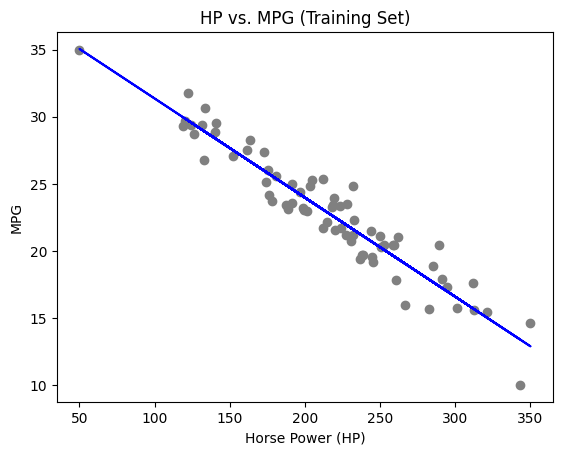

In [32]:
plt.scatter(X_train, y_train, color = 'gray')
plt.plot(X_train, regressor.predict(X_train), color = 'blue')
plt.xlabel('Horse Power (HP)')
plt.ylabel('MPG')
plt.title('HP vs. MPG (Training Set)')

Text(0.5, 1.0, 'HP vs. MPG (Testing Set)')

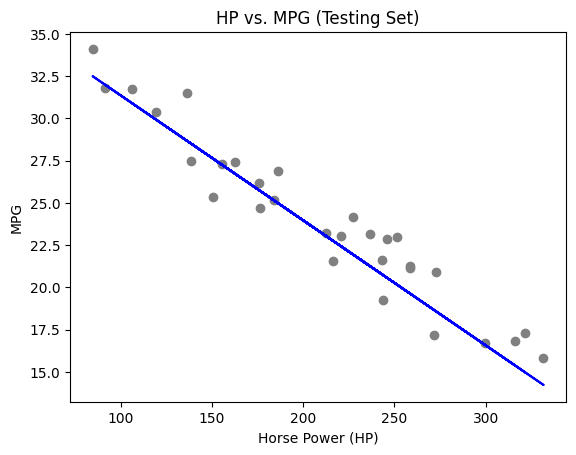

In [33]:
plt.scatter(X_test, y_test, color = 'gray')
plt.plot(X_test, regressor.predict(X_test), color = 'blue')
plt.xlabel('Horse Power (HP)')
plt.ylabel('MPG')
plt.title('HP vs. MPG (Testing Set)')

In [34]:
HP = 500
# MPG?